In [60]:
from models.tree_models import MyExtraTreesRegressor, MyExtraTreesClassifier, MyRandomForestRegressor, MyRandomForestClassifier
from models.monthly_average import MonthlyAverageClassifier
from data_helper import DataHelper
from days_statistics import DaysStatistics
from datetime import timedelta, date, datetime
import pandas as pd
import os
import json
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from models.tree_models import MyExtraTreesRegressor, MyExtraTreesClassifier, MyRandomForestRegressor, MyRandomForestClassifier
from bs4 import BeautifulSoup
import urllib.request
import sys
import unicodedata
%matplotlib inline

In [129]:
import numpy as np
np.set_printoptions(suppress=True)

In [28]:
api_response = '{"cod":"200","message":0,"cnt":40,"list":[{"dt":1578830400,"main":{"temp":5.62,"feels_like":1.07,"temp_min":4.3,"temp_max":5.62,"pressure":1026,"sea_level":1026,"grnd_level":986,"humidity":62,"temp_kf":1.32},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"clouds":{"all":26},"wind":{"speed":3.45,"deg":200},"sys":{"pod":"d"},"dt_txt":"2020-01-12 12:00:00"},{"dt":1578841200,"main":{"temp":4.12,"feels_like":-0.55,"temp_min":3.13,"temp_max":4.12,"pressure":1025,"sea_level":1025,"grnd_level":985,"humidity":68,"temp_kf":0.99},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":3.58,"deg":198},"sys":{"pod":"d"},"dt_txt":"2020-01-12 15:00:00"},{"dt":1578852000,"main":{"temp":2.46,"feels_like":-2.74,"temp_min":1.8,"temp_max":2.46,"pressure":1026,"sea_level":1026,"grnd_level":985,"humidity":72,"temp_kf":0.66},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":98},"wind":{"speed":4.19,"deg":217},"sys":{"pod":"n"},"dt_txt":"2020-01-12 18:00:00"},{"dt":1578862800,"main":{"temp":2.45,"feels_like":-2.87,"temp_min":2.12,"temp_max":2.45,"pressure":1026,"sea_level":1026,"grnd_level":985,"humidity":79,"temp_kf":0.33},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"clouds":{"all":47},"wind":{"speed":4.6,"deg":234},"sys":{"pod":"n"},"dt_txt":"2020-01-12 21:00:00"},{"dt":1578873600,"main":{"temp":2.31,"feels_like":-2.01,"temp_min":2.31,"temp_max":2.31,"pressure":1026,"sea_level":1026,"grnd_level":986,"humidity":85,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"clouds":{"all":74},"wind":{"speed":3.34,"deg":218},"sys":{"pod":"n"},"dt_txt":"2020-01-13 00:00:00"},{"dt":1578884400,"main":{"temp":1.71,"feels_like":-2.8,"temp_min":1.71,"temp_max":1.71,"pressure":1025,"sea_level":1025,"grnd_level":986,"humidity":89,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":98},"wind":{"speed":3.62,"deg":240},"sys":{"pod":"n"},"dt_txt":"2020-01-13 03:00:00"},{"dt":1578895200,"main":{"temp":2,"feels_like":-2.55,"temp_min":2,"temp_max":2,"pressure":1026,"sea_level":1026,"grnd_level":986,"humidity":89,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":99},"wind":{"speed":3.75,"deg":205},"sys":{"pod":"n"},"dt_txt":"2020-01-13 06:00:00"},{"dt":1578906000,"main":{"temp":3.46,"feels_like":-0.48,"temp_min":3.46,"temp_max":3.46,"pressure":1025,"sea_level":1025,"grnd_level":984,"humidity":83,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":2.98,"deg":207},"sys":{"pod":"d"},"dt_txt":"2020-01-13 09:00:00"},{"dt":1578916800,"main":{"temp":5.88,"feels_like":2.84,"temp_min":5.88,"temp_max":5.88,"pressure":1023,"sea_level":1023,"grnd_level":984,"humidity":75,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":1.9,"deg":224},"sys":{"pod":"d"},"dt_txt":"2020-01-13 12:00:00"},{"dt":1578927600,"main":{"temp":3.73,"feels_like":0.83,"temp_min":3.73,"temp_max":3.73,"pressure":1021,"sea_level":1021,"grnd_level":982,"humidity":84,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":1.58,"deg":151},"sys":{"pod":"d"},"dt_txt":"2020-01-13 15:00:00"},{"dt":1578938400,"main":{"temp":2.41,"feels_like":-1.26,"temp_min":2.41,"temp_max":2.41,"pressure":1021,"sea_level":1021,"grnd_level":981,"humidity":86,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":100},"wind":{"speed":2.47,"deg":172},"sys":{"pod":"n"},"dt_txt":"2020-01-13 18:00:00"},{"dt":1578949200,"main":{"temp":1.45,"feels_like":-3.21,"temp_min":1.45,"temp_max":1.45,"pressure":1020,"sea_level":1020,"grnd_level":980,"humidity":78,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":98},"wind":{"speed":3.44,"deg":178},"sys":{"pod":"n"},"dt_txt":"2020-01-13 21:00:00"},{"dt":1578960000,"main":{"temp":1,"feels_like":-3.23,"temp_min":1,"temp_max":1,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":78,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":94},"wind":{"speed":2.74,"deg":188},"sys":{"pod":"n"},"dt_txt":"2020-01-14 00:00:00"},{"dt":1578970800,"main":{"temp":-0.46,"feels_like":-4.62,"temp_min":-0.46,"temp_max":-0.46,"pressure":1017,"sea_level":1017,"grnd_level":978,"humidity":87,"temp_kf":0},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"clouds":{"all":39},"wind":{"speed":2.65,"deg":173},"sys":{"pod":"n"},"dt_txt":"2020-01-14 03:00:00"},{"dt":1578981600,"main":{"temp":-0.22,"feels_like":-4.02,"temp_min":-0.22,"temp_max":-0.22,"pressure":1018,"sea_level":1018,"grnd_level":978,"humidity":88,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"clouds":{"all":69},"wind":{"speed":2.21,"deg":168},"sys":{"pod":"n"},"dt_txt":"2020-01-14 06:00:00"},{"dt":1578992400,"main":{"temp":2,"feels_like":-2.69,"temp_min":2,"temp_max":2,"pressure":1017,"sea_level":1017,"grnd_level":978,"humidity":70,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":99},"wind":{"speed":3.31,"deg":182},"sys":{"pod":"d"},"dt_txt":"2020-01-14 09:00:00"},{"dt":1579003200,"main":{"temp":5.71,"feels_like":1.22,"temp_min":5.71,"temp_max":5.71,"pressure":1017,"sea_level":1017,"grnd_level":978,"humidity":56,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":83},"wind":{"speed":3.11,"deg":199},"sys":{"pod":"d"},"dt_txt":"2020-01-14 12:00:00"},{"dt":1579014000,"main":{"temp":5.12,"feels_like":0.63,"temp_min":5.12,"temp_max":5.12,"pressure":1018,"sea_level":1018,"grnd_level":978,"humidity":60,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":93},"wind":{"speed":3.18,"deg":188},"sys":{"pod":"d"},"dt_txt":"2020-01-14 15:00:00"},{"dt":1579024800,"main":{"temp":4.04,"feels_like":-0.8,"temp_min":4.04,"temp_max":4.04,"pressure":1019,"sea_level":1019,"grnd_level":979,"humidity":62,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":97},"wind":{"speed":3.58,"deg":189},"sys":{"pod":"n"},"dt_txt":"2020-01-14 18:00:00"},{"dt":1579035600,"main":{"temp":2.86,"feels_like":-1.84,"temp_min":2.86,"temp_max":2.86,"pressure":1019,"sea_level":1019,"grnd_level":979,"humidity":65,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"clouds":{"all":76},"wind":{"speed":3.29,"deg":185},"sys":{"pod":"n"},"dt_txt":"2020-01-14 21:00:00"},{"dt":1579046400,"main":{"temp":2.4,"feels_like":-1.9,"temp_min":2.4,"temp_max":2.4,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":68,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"clouds":{"all":82},"wind":{"speed":2.75,"deg":171},"sys":{"pod":"n"},"dt_txt":"2020-01-15 00:00:00"},{"dt":1579057200,"main":{"temp":2.16,"feels_like":-1.77,"temp_min":2.16,"temp_max":2.16,"pressure":1018,"sea_level":1018,"grnd_level":979,"humidity":70,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":100},"wind":{"speed":2.25,"deg":174},"sys":{"pod":"n"},"dt_txt":"2020-01-15 03:00:00"},{"dt":1579068000,"main":{"temp":1.2,"feels_like":-2.51,"temp_min":1.2,"temp_max":1.2,"pressure":1018,"sea_level":1018,"grnd_level":979,"humidity":71,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":93},"wind":{"speed":1.82,"deg":157},"sys":{"pod":"n"},"dt_txt":"2020-01-15 06:00:00"},{"dt":1579078800,"main":{"temp":2,"feels_like":-2.28,"temp_min":2,"temp_max":2,"pressure":1019,"sea_level":1019,"grnd_level":981,"humidity":70,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":72},"wind":{"speed":2.73,"deg":175},"sys":{"pod":"d"},"dt_txt":"2020-01-15 09:00:00"},{"dt":1579089600,"main":{"temp":3.81,"feels_like":-0.41,"temp_min":3.81,"temp_max":3.81,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":67,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":86},"wind":{"speed":2.85,"deg":175},"sys":{"pod":"d"},"dt_txt":"2020-01-15 12:00:00"},{"dt":1579100400,"main":{"temp":2.79,"feels_like":-1.41,"temp_min":2.79,"temp_max":2.79,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":75,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":59},"wind":{"speed":2.93,"deg":165},"sys":{"pod":"d"},"dt_txt":"2020-01-15 15:00:00"},{"dt":1579111200,"main":{"temp":1,"feels_like":-2.94,"temp_min":1,"temp_max":1,"pressure":1021,"sea_level":1021,"grnd_level":982,"humidity":81,"temp_kf":0},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"clouds":{"all":47},"wind":{"speed":2.42,"deg":177},"sys":{"pod":"n"},"dt_txt":"2020-01-15 18:00:00"},{"dt":1579122000,"main":{"temp":1.15,"feels_like":-2.84,"temp_min":1.15,"temp_max":1.15,"pressure":1023,"sea_level":1023,"grnd_level":984,"humidity":78,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":99},"wind":{"speed":2.43,"deg":199},"sys":{"pod":"n"},"dt_txt":"2020-01-15 21:00:00"},{"dt":1579132800,"main":{"temp":1.35,"feels_like":-2.91,"temp_min":1.35,"temp_max":1.35,"pressure":1024,"sea_level":1024,"grnd_level":985,"humidity":75,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":99},"wind":{"speed":2.75,"deg":194},"sys":{"pod":"n"},"dt_txt":"2020-01-16 00:00:00"},{"dt":1579143600,"main":{"temp":1.52,"feels_like":-1.75,"temp_min":1.52,"temp_max":1.52,"pressure":1025,"sea_level":1025,"grnd_level":985,"humidity":76,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":100},"wind":{"speed":1.4,"deg":194},"sys":{"pod":"n"},"dt_txt":"2020-01-16 03:00:00"},{"dt":1579154400,"main":{"temp":1.51,"feels_like":-1.65,"temp_min":1.51,"temp_max":1.51,"pressure":1026,"sea_level":1026,"grnd_level":986,"humidity":76,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"clouds":{"all":100},"wind":{"speed":1.24,"deg":172},"sys":{"pod":"n"},"dt_txt":"2020-01-16 06:00:00"},{"dt":1579165200,"main":{"temp":3.48,"feels_like":0.26,"temp_min":3.48,"temp_max":3.48,"pressure":1027,"sea_level":1027,"grnd_level":987,"humidity":68,"temp_kf":0},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":87},"wind":{"speed":1.39,"deg":175},"sys":{"pod":"d"},"dt_txt":"2020-01-16 09:00:00"},{"dt":1579176000,"main":{"temp":6.27,"feels_like":3.32,"temp_min":6.27,"temp_max":6.27,"pressure":1025,"sea_level":1025,"grnd_level":986,"humidity":59,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":74},"wind":{"speed":1.14,"deg":131},"sys":{"pod":"d"},"dt_txt":"2020-01-16 12:00:00"},{"dt":1579186800,"main":{"temp":5.03,"feels_like":2.12,"temp_min":5.03,"temp_max":5.03,"pressure":1025,"sea_level":1025,"grnd_level":985,"humidity":70,"temp_kf":0},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"clouds":{"all":30},"wind":{"speed":1.32,"deg":115},"sys":{"pod":"d"},"dt_txt":"2020-01-16 15:00:00"},{"dt":1579197600,"main":{"temp":3.1,"feels_like":0.21,"temp_min":3.1,"temp_max":3.1,"pressure":1024,"sea_level":1024,"grnd_level":985,"humidity":81,"temp_kf":0},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"clouds":{"all":15},"wind":{"speed":1.32,"deg":134},"sys":{"pod":"n"},"dt_txt":"2020-01-16 18:00:00"},{"dt":1579208400,"main":{"temp":1.95,"feels_like":-0.85,"temp_min":1.95,"temp_max":1.95,"pressure":1024,"sea_level":1024,"grnd_level":984,"humidity":86,"temp_kf":0},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"clouds":{"all":0},"wind":{"speed":1.14,"deg":140},"sys":{"pod":"n"},"dt_txt":"2020-01-16 21:00:00"},{"dt":1579219200,"main":{"temp":0.94,"feels_like":-2.73,"temp_min":0.94,"temp_max":0.94,"pressure":1022,"sea_level":1022,"grnd_level":983,"humidity":87,"temp_kf":0},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"clouds":{"all":0},"wind":{"speed":2.21,"deg":128},"sys":{"pod":"n"},"dt_txt":"2020-01-17 00:00:00"},{"dt":1579230000,"main":{"temp":-0.21,"feels_like":-3.83,"temp_min":-0.21,"temp_max":-0.21,"pressure":1020,"sea_level":1020,"grnd_level":981,"humidity":87,"temp_kf":0},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"clouds":{"all":0},"wind":{"speed":1.92,"deg":111},"sys":{"pod":"n"},"dt_txt":"2020-01-17 03:00:00"},{"dt":1579240800,"main":{"temp":-0.6,"feels_like":-4.69,"temp_min":-0.6,"temp_max":-0.6,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":89,"temp_kf":0},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"clouds":{"all":4},"wind":{"speed":2.58,"deg":154},"sys":{"pod":"n"},"dt_txt":"2020-01-17 06:00:00"},{"dt":1579251600,"main":{"temp":1.03,"feels_like":-3.29,"temp_min":1.03,"temp_max":1.03,"pressure":1019,"sea_level":1019,"grnd_level":980,"humidity":81,"temp_kf":0},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":84},"wind":{"speed":2.97,"deg":183},"sys":{"pod":"d"},"dt_txt":"2020-01-17 09:00:00"}],"city":{"id":3067696,"name":"Prague","coord":{"lat":50.088,"lon":14.4208},"country":"CZ","timezone":3600,"sunrise":1578812263,"sunset":1578842555}}'
json_data = json.loads(api_response)

In [3]:
for weather_prediction in json_data['list']:
    time = datetime.fromtimestamp(weather_prediction['dt']) #- timedelta(hours=1)
    temperature = weather_prediction['main']['temp']
    wind = weather_prediction['wind']['speed']

    rain, snow = 0.0, 0.0
    if 'rain' in weather_prediction['main']:
         rain = weather_prediction['main']['rain']['3h']
    if 'snow' in weather_prediction['main']:
         rain = weather_prediction['main']['snow']['3h']

    precipitation = rain + snow
    pressure =  weather_prediction['main']['pressure']
    print('Prediction for %s: temperature: %0.1f, wind: %0.1f, precipitation: %0.1f, pressure: %0.1f,'%(time, temperature,wind,precipitation,pressure))

Prediction for 2020-01-12 13:00:00: temperature: 5.6, wind: 3.5, precipitation: 0.0, pressure: 1026.0,
Prediction for 2020-01-12 16:00:00: temperature: 4.1, wind: 3.6, precipitation: 0.0, pressure: 1025.0,
Prediction for 2020-01-12 19:00:00: temperature: 2.5, wind: 4.2, precipitation: 0.0, pressure: 1026.0,
Prediction for 2020-01-12 22:00:00: temperature: 2.5, wind: 4.6, precipitation: 0.0, pressure: 1026.0,
Prediction for 2020-01-13 01:00:00: temperature: 2.3, wind: 3.3, precipitation: 0.0, pressure: 1026.0,
Prediction for 2020-01-13 04:00:00: temperature: 1.7, wind: 3.6, precipitation: 0.0, pressure: 1025.0,
Prediction for 2020-01-13 07:00:00: temperature: 2.0, wind: 3.8, precipitation: 0.0, pressure: 1026.0,
Prediction for 2020-01-13 10:00:00: temperature: 3.5, wind: 3.0, precipitation: 0.0, pressure: 1025.0,
Prediction for 2020-01-13 13:00:00: temperature: 5.9, wind: 1.9, precipitation: 0.0, pressure: 1023.0,
Prediction for 2020-01-13 16:00:00: temperature: 3.7, wind: 1.6, precipit

In [85]:
clf = MyExtraTreesRegressor()
clf.fit_on_training_set()

In [169]:
class Predictor():
    
    def __init__(self):
        """
        Constructor
        """
        self.dh = DataHelper()
        self.ds = DaysStatistics()
        self.columns = ['pool', 'lines_reserved', 'day_of_week', 'month', 'day', 'hour', 'minute', 'holiday', 'reserved_Lavoda', 'reserved_Club Junior', 'reserved_Elab', 'reserved_Vodnik', 'reserved_Spirala', 'reserved_Amalka', 'reserved_Dukla', 'reserved_Lodicka', 'reserved_Elab team', 'reserved_Sports Team', 'reserved_Modra Hvezda', 'reserved_VSC MSMT', 'reserved_Orka', 'reserved_Activity', 'reserved_Aquamen', 'reserved_Zralok', 'reserved_SK Impuls', 'reserved_Motylek', 'reserved_3fit', 'reserved_Jitka Vachtova', 'reserved_Hodbod', 'reserved_DUFA', 'reserved_The Swim', 'reserved_Neptun', 'reserved_Strahov Cup', 'reserved_Apneaman', 'reserved_Michovsky', 'reserved_Betri', 'reserved_Pospisil', 'reserved_Vachtova', 'reserved_Riverside', 'reserved_Vodni polo Sparta', 'reserved_Road 2 Kona', 'reserved_Water Polo Sparta Praha', 'reserved_Sucha', 'reserved_Totkovicova', 'reserved_DDM Spirala', 'reserved_PS Perla', 'reserved_Dufkova - pulka drahy', 'reserved_Pavlovec', 'reserved_Sidorovich', 'reserved_OS DUFA',  'reserved_other', 'minute_of_day', 'year']
        self.prediction_steps = 210
        
    def get_date_string(self, date):
        """
        Generates part of URL address for Sutka pool web page with table of reserved lines for given date.
        :param date: Datetime.date
        :return: The rest of URL that starts with: http://www.sutka.eu/obsazenost-bazenu
        """
        next_day = date + timedelta(days=1)
        day_str = date.strftime('%d.%m.%Y')
        next_day_str = next_day.strftime('%d.%m.%Y')
        addr_str = '?from='+day_str+'&to='+next_day_str+'&send=Zobrazit&do=form-submit'
        return addr_str

    def parse_line_usage_table(self, table_rows):
        """
        Parse table with reserved lines from web page http://www.sutka.eu/obsazenost-bazenu
        :param table_rows: HTML table from web that is prepared in method get_lines_usage_for_day
        :return: list with 64 items. Each item is 15 minute time slot starting from 6:00
        """
        time_slots = ['']*64
        i = 0
        for i in range(1,9): 
            row = table_rows[i]
            slot = 0
            row_str = '|'
            th = row.find_all('th')

            cols = row.find_all('td')
            for col in cols:
                if len(col) == 3:
                    title = unicodedata.normalize('NFKD', col.attrs['title']).encode('ascii','ignore')
                    if 'colspan' in col.attrs:
                        row_str += ' * | * |'
                        time_slots[slot] += title.decode('utf-8')+','
                        time_slots[slot+1] += title.decode('utf-8')+','
                        slot += 2
                    else:
                        row_str += ' * |'
                        time_slots[slot] += title.decode('utf-8')+','
                        slot += 1
                else:
                    row_str += '   |'
                    slot += 1
        time_slots[63] = time_slots[61]
        time_slots[62] = time_slots[61]
        time_slots[61] = time_slots[60]
        return time_slots

    def get_lines_usage_for_day(self, day):
        """
        Generates list with lines reservations for the day
        :param day: Datetime.date of interest
        :return: list with 64 items. Each item is 15 minute time slot starting from 6:00
        """
        date_str = self.get_date_string(day)
        r = urllib.request.urlopen('http://www.sutka.eu/obsazenost-bazenu'+date_str).read()
        soup = BeautifulSoup(r, 'html.parser')
        table = soup.find('table', attrs={'class':'pooltable'})
        table_rows = table.find_all('tr')
        return self.parse_line_usage_table(table_rows)

    def prepare_feature_vectors(self, columns, data_dict, time_steps_back, lines_reservations=None):
        """
        Generates feature vector for prediction algorithms
        :param columns: List with names of columns that must be in feature vector
        :param data_dict: Dictionary with time data containing columns names and default vaules
        :param time_steps_back: Number of time steps for one input to prediction algorithm
        :return: Arrays x and y with prepared features in x
        """
        
        lines_reserved_id = -1
        org_ids = dict()
        for org_id, column in enumerate(columns):
            if column.startswith('reserved_'):
                org_ids[column] = org_id
            if column == 'lines_reserved':
                lines_reserved_id = org_id

        if lines_reservations is None:
            lines_reservations = ['']*64
            
        data = list()
        for i in range(self.prediction_steps):
            data.append([0]*len(columns))
            for j, column in enumerate(columns):
                if column in data_dict:
                    data[i][j] = data_dict[column]

            slot_id = (data_dict['minute_of_day']-360)//15
            if slot_id >= 0 and slot_id < 64:
                org_list = lines_reservations[slot_id].split(',')[:-1]
                for name in org_list:
                    feature_name = 'reserved_' + name
                    if feature_name in columns:
                        data[i][org_ids[feature_name]] += 1
                    elif 'reserved_other' in columns:
                        data[i][org_ids['reserved_other']] += 1
                        
                    if lines_reserved_id >= 0:
                        data[i][lines_reserved_id] += 1
                        
            data_dict['minute'] += 5
            data_dict['minute_of_day'] += 5
            if data_dict['minute'] == 60:
                data_dict['minute'] = 0
                data_dict['hour'] += 1

        df = pd.DataFrame(data, columns=columns) 
        return self.dh.build_timeseries(df, time_steps_back)
    
    def daterange(self, start_date, end_date):
        """
        Generator of dates from start_date to end_date
        :param start_date: Datetime.date of first date to be generated
        :param end_date: Datetime.date where to stop generator. This day will not be generated.
        """
        for n in range(int ((end_date - start_date).days)):
            yield start_date + timedelta(n)
            
    def export_prediction_2(self, y_pred, day_of_week, month, day):
        s = 'time,pool,lines_reserved\n'
        pred_id = 0
        slot_id = 0
        for hour in range(24):
            for minute in range(0,60,5):
                prediction = 0
                if day_of_week > 4:
                    if slot_id > 105 and hour < 22:
                        prediction = y_pred[pred_id]
                        pred_id+=1
                else:
                    if slot_id > 57 and hour < 22:
                        prediction = y_pred[pred_id]
                        pred_id+=1
                s += '2020-%02d-%02d %02d:%02d:00,%d,0\n'%(month,day,hour,minute,prediction)
                slot_id += 1
        fn = '2020-%02d-%02d.csv'%(month,day)
        text_file = open(fn, "w")
        text_file.write(s)
        text_file.close()
            
    def export_prediction(self, y_pred, export_folder, single_day, time_steps_back=3):
        df = pd.DataFrame(columns=['time','pool'])
        time_step = datetime.strptime(single_day.strftime('%Y%m%d'), '%Y%m%d')
        if single_day.weekday() > 4:
            start_minute = 480
            start_hour = 8
            self.prediction_steps = 169
        else:
            self.prediction_steps = 217
            start_hour = 4
            start_minute = 240

        hour = 0
        minute = 0
        for i in range(288):
            time_step = time_step.replace(hour=hour, minute=minute)
            df.loc[i] = [time_step.strftime('%Y-%m-%d %H:%M:%S'), 0]
            minute += 5
            if minute == 60:
                minute = 0
                hour += 1

        hour = start_hour
        minute = 5*time_steps_back
        y_id = 0
        df_id = df[df['time'] == time_step.strftime('%Y-%m-%d')+' 0'+str(start_hour)+':00:00'].index.item() + time_steps_back + 1
        while df_id < 288:
            time_step = time_step.replace(hour=hour, minute=minute)
            print(i, time_step)
            df.loc[i] = [time_step.strftime('%Y-%m-%d %H:%M:%S'), y_pred[y_id]]
            minute += 5
            y_id += 1
            df_id += 1
            if minute == 60:
                minute = 0
                hour += 1

        csv_file = os.path.join(export_folder, time_step.strftime('%Y-%m-%d')+'.csv')
        export_csv = df.to_csv(csv_file, index = None, header=True)
        
    def generate_predictions(self, estimator, start_date, end_date, export_folder, columns=['pool','day_of_week','month','hour','minute'], time_steps_back=3):
        for single_day in self.daterange(start_date, end_date):
            if single_day.weekday() > 4:
                start_minute = 480
                start_hour = 8
                self.prediction_steps = 169
            else:
                self.prediction_steps = 217
                start_hour = 4
                start_minute = 240
                
            data_dict = {
                'month' : int(single_day.strftime('%m')),
                'day' : int(single_day.strftime('%d')),
                'hour' : start_hour,
                'minute' : 0,
                'minute_of_day' : start_minute,
                'year' : int(single_day.strftime('%Y')),
                'day_of_week' : single_day.weekday(),
                'temperature_binned':3,
                'wind_binned':1,
                'humidity_binned':3,
                'precipitation_binned':0,
                'pressure_binned':2
            }
            
            for column in columns:
                if column.startswith('reserved'):
                    data_dict[column] = 0
            x, y = self.prepare_feature_vectors(columns, data_dict, time_steps_back,self.get_lines_usage_for_day(single_day))
            y_pred = self.dh.predict_day_from_features(x, estimator, time_steps_back)

#             for i, y_val in enumerate(y_pred):
#                 print(i, y_val,x[i][5:7],x[i][-2])
            self.export_prediction_2(y_pred, single_day.weekday(), int(single_day.strftime('%m')), int(single_day.strftime('%d')))
#             self.export_prediction(y_pred, export_folder, single_day, time_steps_back)

p = Predictor()
d = datetime.now()
start_date = date(2020, 1, 13)
end_date = date(2020, 1, 14)
time_steps_back = 2
p.generate_predictions(clf.model, start_date, end_date, 'export', clf.columns, clf.time_steps_back)
# p.generate_predictions(clf, start_date, end_date, '.', ['pool','day_of_week', 'temperature_binned','lines_reserved','reserved_Lavoda','reserved_other'], time_steps_back)

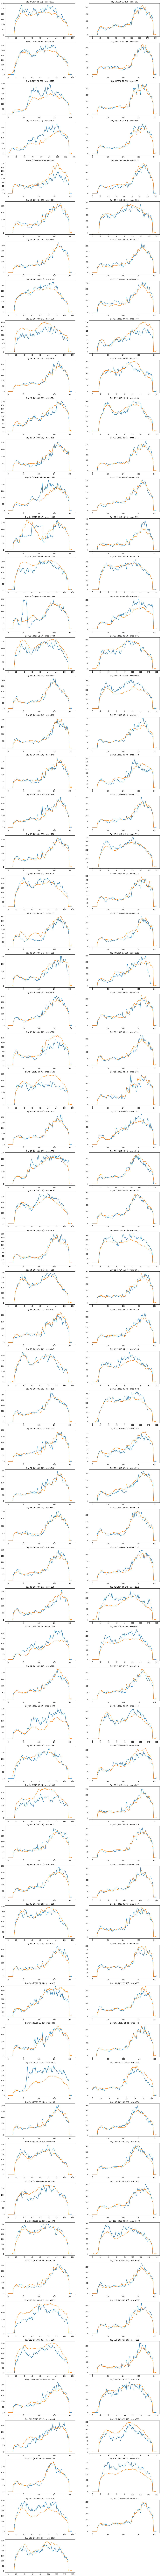

In [97]:
clf.show_n_predictions('all')

In [125]:
dh = DataHelper()
test_days = dh.get_testing_days()
for day in test_days:
    print(len(day.data), day.data['day_of_week'].iloc[0], day.data['time'].iloc[0], day.data['time'].iloc[len(day.data)-1],day.data['minute_of_day'].iloc[0], day.data['minute_of_day'].iloc[len(day.data)-1])

169 6 2018-05-27 08:00:06 2018-05-27 22:00:03 480 1320
213 0 2018-03-12 04:00:05 2018-03-12 22:00:02 240 1320
169 5 2019-02-02 08:00:04 2019-02-02 22:00:02 480 1320
217 0 2018-10-08 04:00:01 2018-10-08 22:00:06 240 1320
215 3 2017-12-28 04:02:26 2017-12-28 22:00:02 242 1320
217 2 2018-10-24 04:00:02 2018-10-24 22:00:02 240 1320
204 1 2018-01-02 04:01:02 2018-01-02 22:00:03 241 1320
217 2 2018-09-12 04:00:01 2018-09-12 22:00:02 240 1320
216 1 2017-12-19 04:01:46 2017-12-19 22:00:02 241 1320
212 0 2018-02-26 04:00:02 2018-02-26 22:00:02 240 1320
217 3 2019-04-25 04:00:02 2019-04-25 22:00:01 240 1320
169 6 2019-08-11 08:00:06 2019-08-11 22:00:03 480 1320
217 1 2018-01-16 04:00:04 2018-01-16 22:00:01 240 1320
217 1 2019-03-26 04:00:01 2019-03-26 22:00:06 240 1320
169 6 2018-06-17 08:00:03 2018-06-17 22:00:01 480 1320
217 1 2019-05-28 04:00:01 2019-05-28 22:00:02 240 1320
169 5 2019-08-17 08:00:06 2019-08-17 22:00:04 480 1320
217 3 2019-07-04 04:00:04 2019-07-04 22:00:02 240 1320
217 2 2018

In [112]:
day = dh.get_testing_days()[118]
print(len(day.data))

169


In [113]:
print(day.data)

       pool  lines_reserved                 time  day_of_week  month  day  \
93172     0               0  2019-02-03 08:00:04            6      2    3   
93173     0               0  2019-02-03 08:05:04            6      2    3   
93174     0               0  2019-02-03 08:10:03            6      2    3   
93175     0               0  2019-02-03 08:15:04            6      2    3   
93176     0               0  2019-02-03 08:20:04            6      2    3   
...     ...             ...                  ...          ...    ...  ...   
93336    40               0  2019-02-03 21:40:04            6      2    3   
93337    40               0  2019-02-03 21:45:04            6      2    3   
93338    31               0  2019-02-03 21:50:04            6      2    3   
93339    21               0  2019-02-03 21:55:04            6      2    3   
93340     2               0  2019-02-03 22:00:02            6      2    3   

       hour  minute  holiday  reserved_Lavoda  ...  reserved_Sidorovich  \


In [133]:
x,y = dh.get_test_day_feature_vectors(118, clf.columns, clf.time_steps_back)
print(x[0])

[   0.    0.    6.    2.    3.    8.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.    2.    4.    1.    1.    0.  480. 2019.    0.    0.
    6.    2.    3.    8.    5.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    1.    2.    4.    1.    1.    0.  485. 2019.    0.    0.    6.    2.
    3.    8.   10.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

In [135]:
print(x[2])

[   0.    0.    6.    2.    3.    8.   10.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.    2.    4.    1.    1.    0.  490. 2019.    0.    0.
    6.    2.    3.    8.   15.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    1.    3.    4.    1.    1.    0.  495. 2019.    0.    0.    6.    2.
    3.    8.   20.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

In [157]:
minute_of_day = 480
n_rows = 16
day_of_week = 6


df = pd.DataFrame()
columns= ['pool','day_of_week', 'lines_reserved','reserved_Lavoda','reserved_other','minute_of_day']

for i in range(n_rows):
    df = df.append({'minute_of_day' : minute_of_day}, ignore_index=True)
    minute_of_day += 5

for column in columns:
    if column == 'day_of_week':
        df[column] = day_of_week
    else:
        df[column] = 0
print(df)

    
# df.fillna(0, inplace=True)
# df = df.astype(int)
print(df)

Empty DataFrame
Columns: [pool, day_of_week, lines_reserved, reserved_Lavoda, reserved_other, minute_of_day]
Index: []
    pool  day_of_week  lines_reserved  reserved_Lavoda  reserved_other  \
0    NaN          NaN             NaN              NaN             NaN   
1    NaN          NaN             NaN              NaN             NaN   
2    NaN          NaN             NaN              NaN             NaN   
3    NaN          NaN             NaN              NaN             NaN   
4    NaN          NaN             NaN              NaN             NaN   
5    NaN          NaN             NaN              NaN             NaN   
6    NaN          NaN             NaN              NaN             NaN   
7    NaN          NaN             NaN              NaN             NaN   
8    NaN          NaN             NaN              NaN             NaN   
9    NaN          NaN             NaN              NaN             NaN   
10   NaN          NaN             NaN              NaN             